<a href="https://colab.research.google.com/github/MatheusRocha0/Marketing-Analytics/blob/main/Marketing-Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Analytics
 
## Fictional Context
 
**Disclaimer: the context I will present here is only for performance purposes. The company, the CMO and the situation are not real.**
 
I was hired by the Visionetworks, a start up with a revolutional philosophy about data-driven applied in the Marketing area.
 
My task is answer questions from the CMO (Chief Marketing Officer) to have insights from the data analysis and make recommendations.
 
To make my task easier, I divided this task into three different sections. They are:
 
# Section 01: Data Cleaning
 
Are there any null values or outliers? 
 
How will I wrangle/handle them?
 
Are there any variables that warrant transformations?
 
Are there any useful variables that I can engineer with the given data?
 
Can I notice any patterns or anomalies in the data? Can I plot them?
 
# Section 02: Exploratory Data Analysis (EDA)
 
What factors are significantly related to the number of store purchases?
 
Does US fare significantly better than the Rest of the World in terms of total purchases?
 
The CMO insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. I will justify or refute this statement using an appropriate analysis
 
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?
 
 What other factors are significantly related to amount spent on fish?
 
Is there a significant relationship between geographical regional and success of a campaign?
 
Which marketing campaign is most successful?
 
Which products are performing best?
 
Which channels are underperforming?
 
# Section 03: CMO Recommendations
 
Bring together everything from Sections 01 and 02 and provide data-driven recommendations/suggestions to the CMO.
 
### You can download the dataset I will be using in this project on Kaggle: https://bit.ly/3pduaQF. Also, the context was based in the task proposed by the user.

# Importing

## Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Data

In [76]:
url = "https://github.com/MatheusRocha0/Marketing-Analytics/raw/main/marketing_data.csv"
df = pd.read_csv(url)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Binary Variables
 
1: True

0: False

# Exploratory Data Analysis (EDA)

## Setup

In [77]:
def jupyter_settings():
   %matplotlib inline
   %pylab inline
   plt.style.use("seaborn-whitegrid")
   plt.rcParams["figure.figsize"] = [10, 10]
   sb.set()
   print("Jupyter Settings")
 
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib
Jupyter Settings


## Variables Types

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Fixing wrong variables
 
*Dt_Customer* and *Income* variables are not with their right variable dtype, I will fix it.

In [79]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
 
df[" Income "] = df[" Income "].str.replace("$", "")
df[" Income "] = df[" Income "].str.replace(",", "")
df[" Income "] = df[" Income "].values.astype(np.float)

## Detecting Missing Values

In [80]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### Cleaning Them

In [81]:
income_mean = df[" Income "].mean()
df[" Income "].fillna(income_mean, inplace = True)

## Detecting Outliers 
 
Compare the difference between **75%** and **Max**. There are outliers if this difference is great.

In [82]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering

In [83]:
df["enroll_year"] = df["Dt_Customer"].dt.year
df["age_when_enrolled"] = (df["enroll_year"] - df["Year_Birth"])
df["total_spent"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])
df["total_children"] = (df["Teenhome"] + df["Kidhome"])
df["total_purchases"] = (df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"])
df["total_spent_but_no_gold"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"])

## Removing Duplicates

In [84]:
df.drop_duplicates(inplace = True)

## Dropping Columns

In [85]:
df.drop("ID", axis = 1, inplace = True)

## Ploting Anomaly in Income Variable

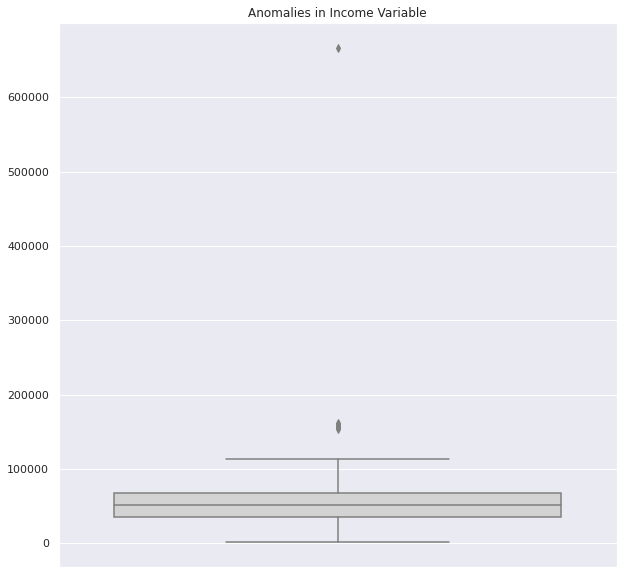

In [86]:
sb.boxplot(y = df[" Income "], color = "lightgray")
plt.title("Anomalies in Income Variable")
plt.ylabel("")
plt.show()

## Dataset Shape

In [87]:
print("Observations:", df.shape[0])
print("Variables:", df.shape[1])

Observations: 2240
Variables: 33


## Variables Distribution

### Numeric Variables

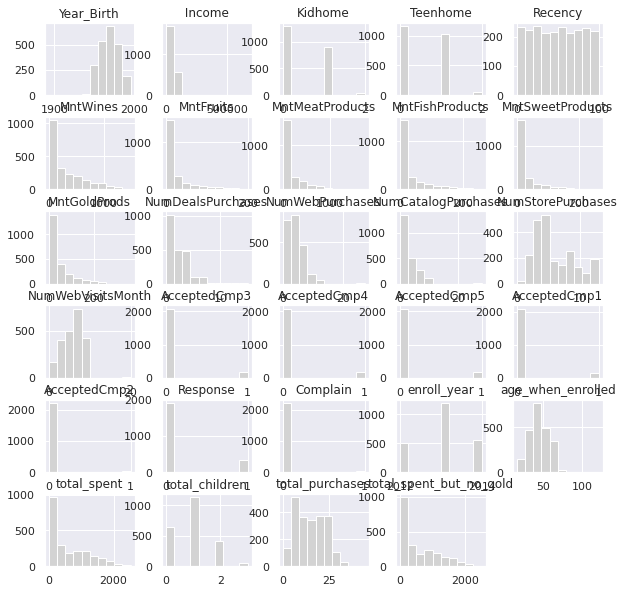

In [88]:
df.hist(color = "lightgray")
plt.show()

### Categorical Variables

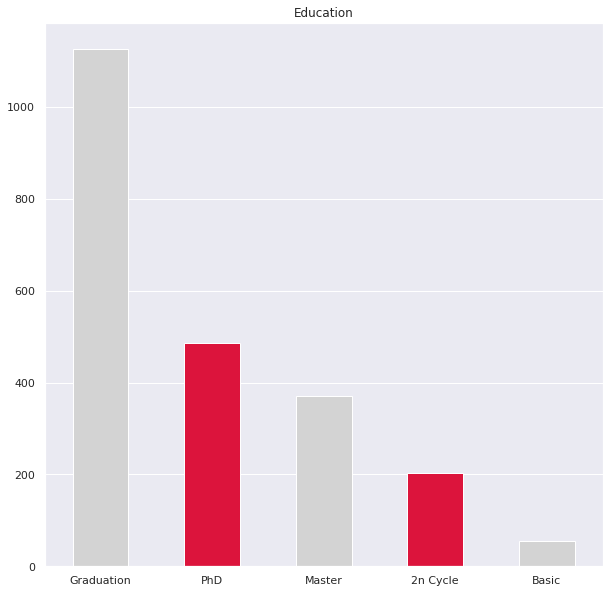

In [89]:
df.Education.value_counts().plot(kind = "bar", color = ["lightgray", "crimson"])
plt.xticks(rotation = 0)
plt.title("Education")
plt.grid(axis = "x")
plt.show()

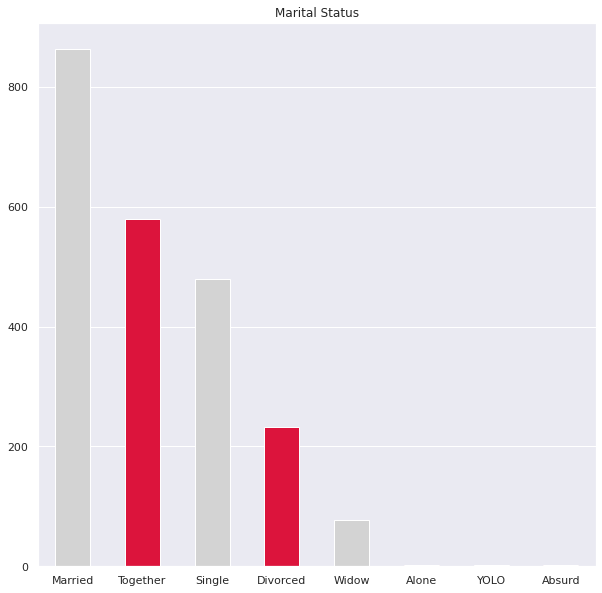

In [90]:
df.Marital_Status.value_counts().plot(kind = "bar", figsize = (10, 10), color = ["lightgrey", "crimson"])
plt.xticks(rotation = 0)
plt.title("Marital Status")
plt.grid(axis = "x")
plt.show()

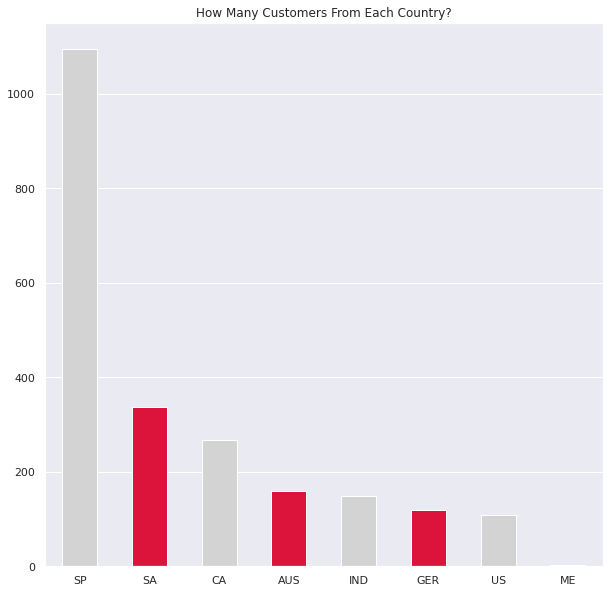

In [91]:
df.Country.value_counts().plot(kind = "bar", figsize = (10, 10), color = ["lightgrey", "crimson"])
plt.xticks(rotation = 0)
plt.title("How Many Customers From Each Country?")
plt.grid(axis = "x")
plt.show()

## Correlation Among the Variables

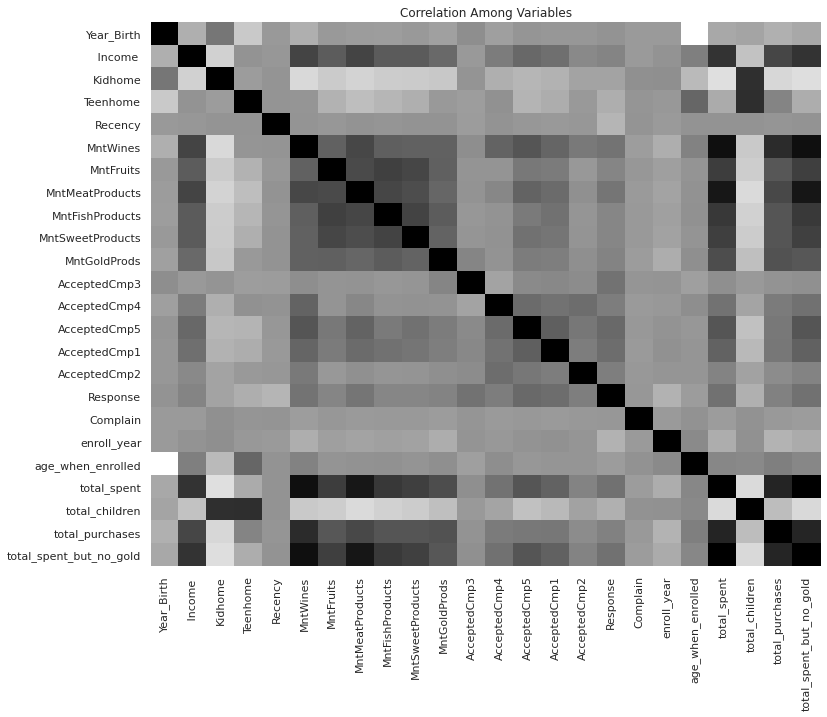

In [92]:
heatmap_df = df.drop(["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"], axis = 1)
 
plt.figure(figsize = (12, 10))
sb.heatmap(heatmap_df.corr(), cbar = False, cmap = "Greys")
plt.title("Correlation Among Variables")
plt.show()

## Pivot Table

In [93]:
df.pivot_table(["age_when_enrolled", " Income ", "Recency", "total_spent", "total_purchases", "total_children"], "Complain")

,Income,Recency,age_when_enrolled,total_children,total_purchases,total_spent
Complain,,,,,,
0,52313.544404,49.072105,44.188824,0.948175,14.877422,607.968905
1,45242.285714,53.047619,47.761905,1.190476,13.238095,376.428571


## Does US fare significantly better than the Rest of the World in terms of total purchases?

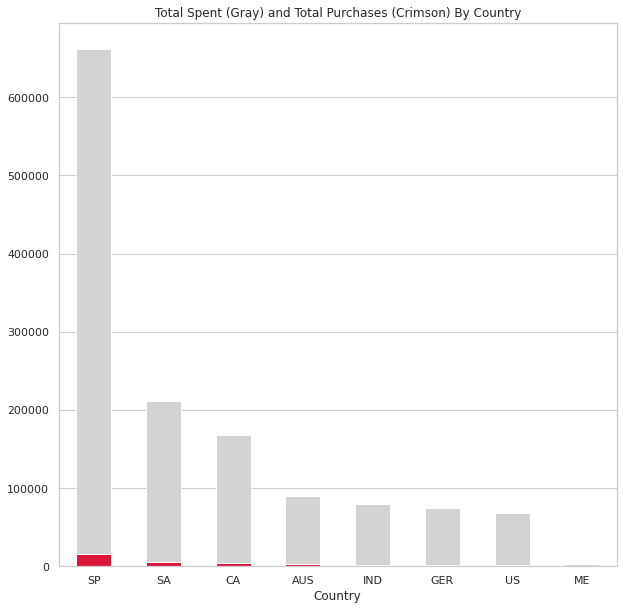

In [96]:
plt.figure(figsize = (10, 10))
df.groupby(df.Country)["total_spent"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (10, 10), color = "lightgray")
df.groupby(df.Country)["total_purchases"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (10, 10), color = "crimson")
plt.title("Total Spent (Gray) and Total Purchases (Crimson) By Country")
plt.xticks(rotation = 0)
plt.grid(axis = "x")
plt.show()

##  Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

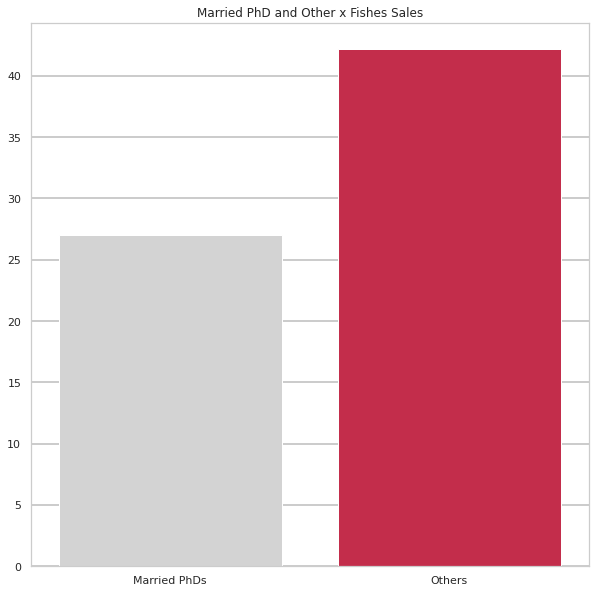

In [97]:
phd_and_married = df.query("Marital_Status == 'Married' and Education == 'PhD'")["MntFishProducts"].mean()
others = df.query("Marital_Status != 'Married' and Education != 'PhD'")["MntFishProducts"].mean()
 
labels = ["Married PhDs", "Others"]
values = [phd_and_married, others]
 
plt.figure(figsize = (10, 10))
sb.barplot(x = labels, y = values, palette = ["lightgrey", "crimson"])
plt.title("Married PhD and Other x Fishes Sales")
plt.grid(True, axis = "y", linewidth = 2)
plt.show()

##  The CMO insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. I will justify or refute this statement using an appropriate analysis

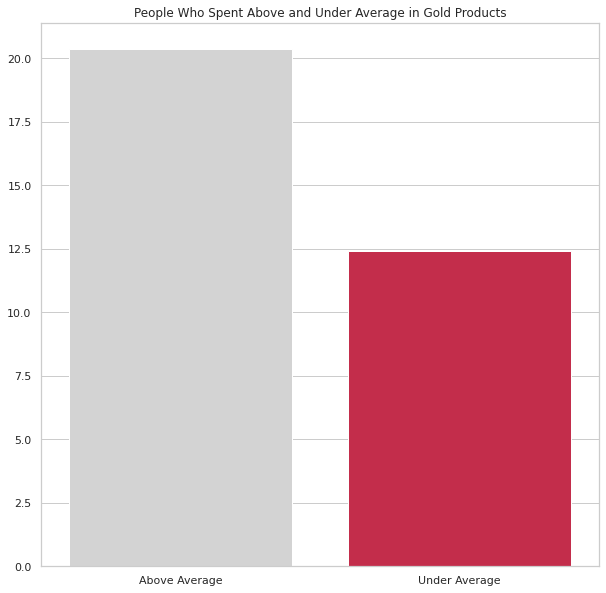

In [98]:
above_gold = df.query("MntGoldProds > 44")["total_purchases"].mean()
under_gold = df.query("MntGoldProds <= 44")["total_purchases"].mean()
 
labels = ["Above Average", "Under Average"]
values = [above_gold, under_gold]
 
plt.figure(figsize = (10, 10))
sb.barplot(x = labels, y = values, palette = ["lightgrey", "crimson"])
plt.title("People Who Spent Above and Under Average in Gold Products")
plt.grid(axis = "y", linewidth = 1)
plt.show()

##  Is there a significant relationship between geographical regional and success of a campaign?

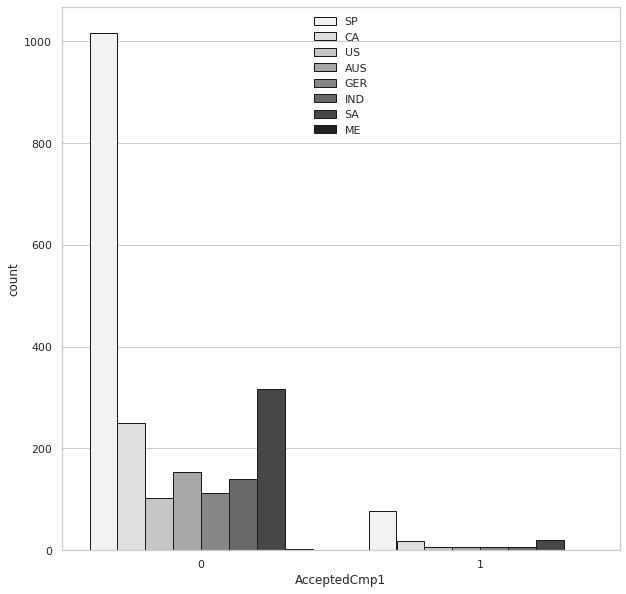

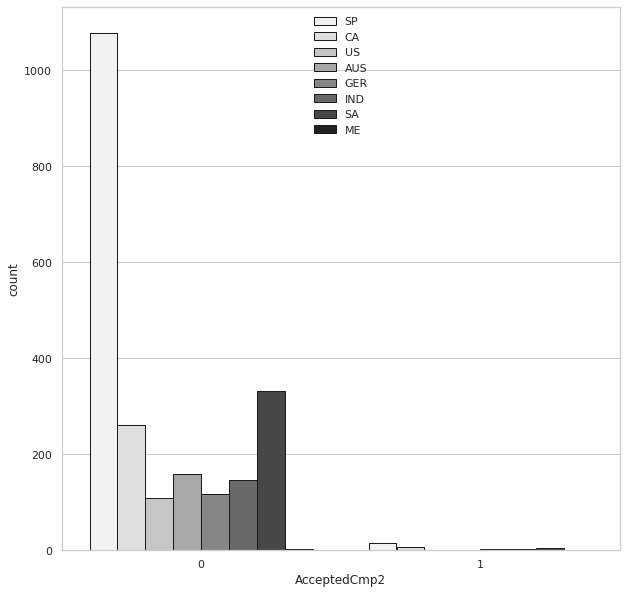

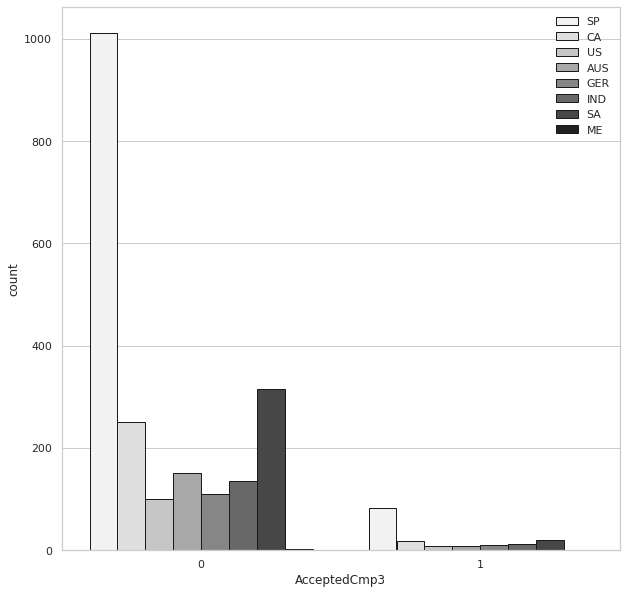

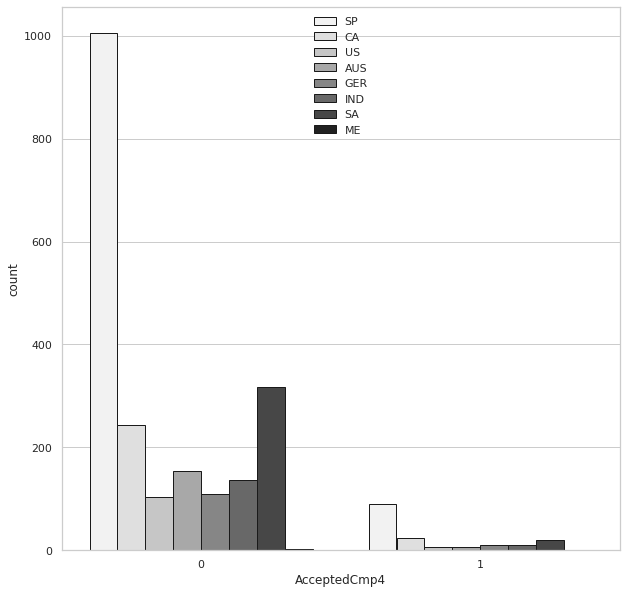

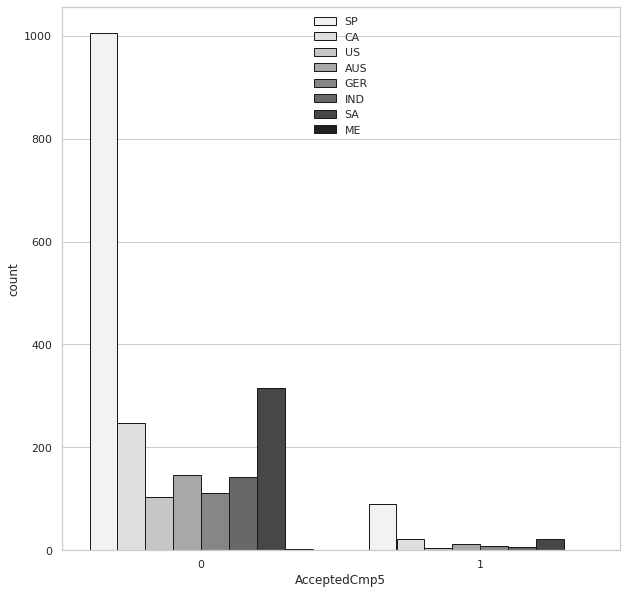

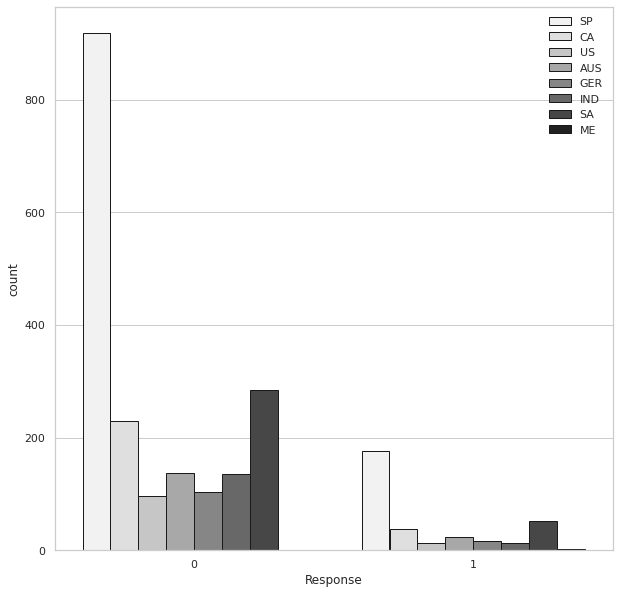

In [99]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response']
 
for campaign in campaigns:
   plt.figure(figsize = (10, 10))
   sb.countplot(data = df, x = campaign, hue = "Country", palette = "Greys", edgecolor = ".1")
   plt.legend(loc = "best")
   plt.show()

 ## Which marketing campaign is most successful?

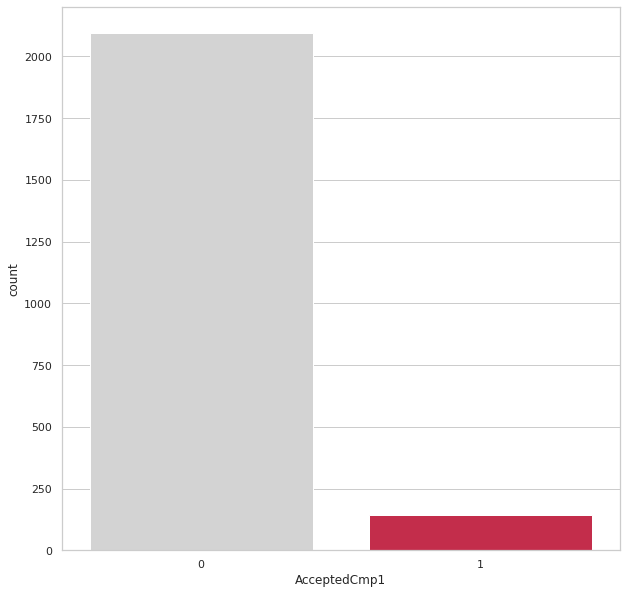

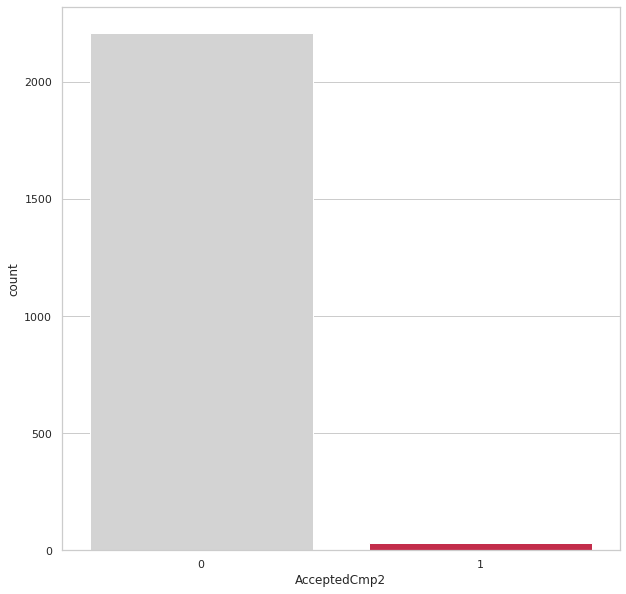

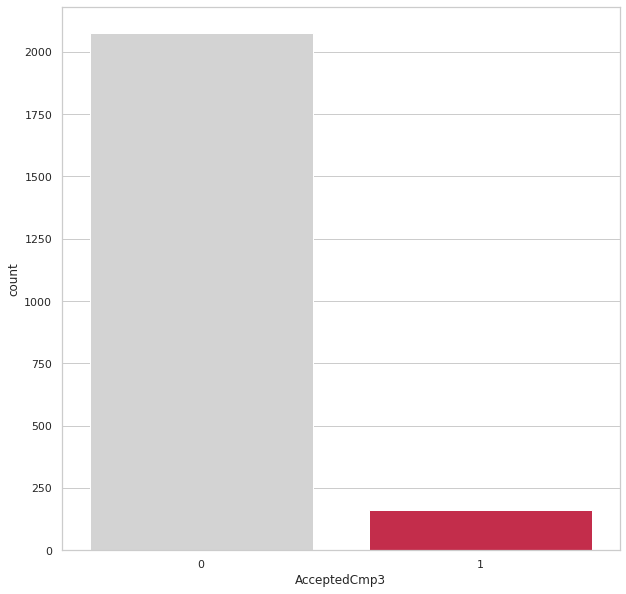

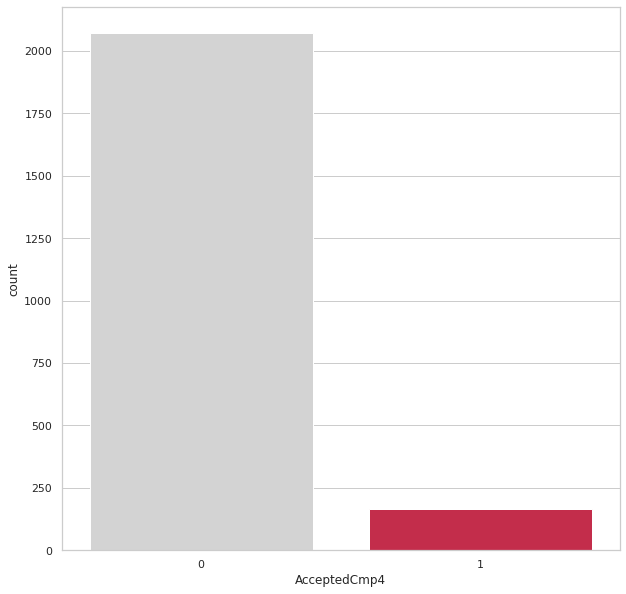

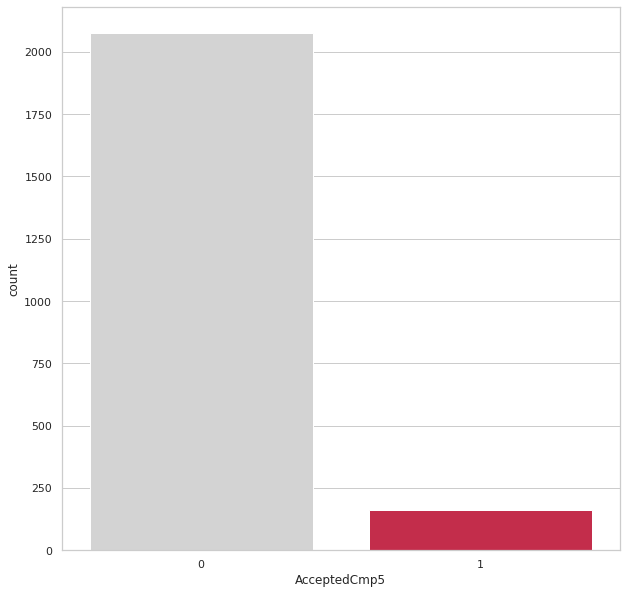

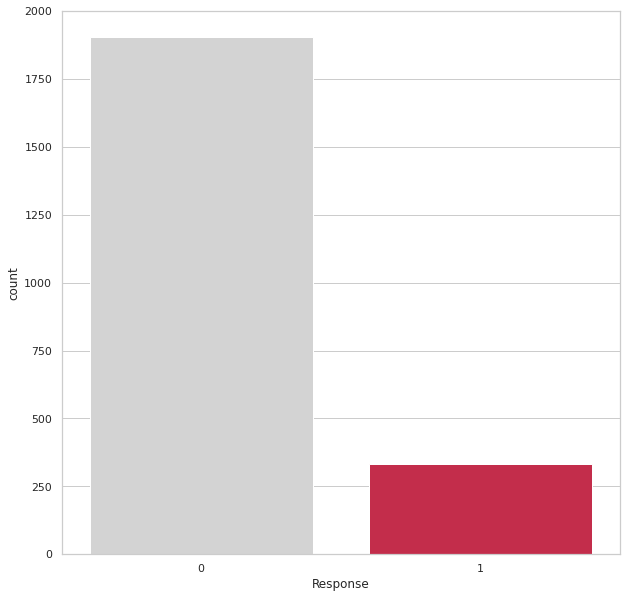

In [100]:
for campaign in campaigns:
   plt.figure(figsize = (10, 10))
   sb.countplot(x = df[campaign], palette = ["lightgrey", "crimson"])
   plt.show()

##  Which products are performing best?

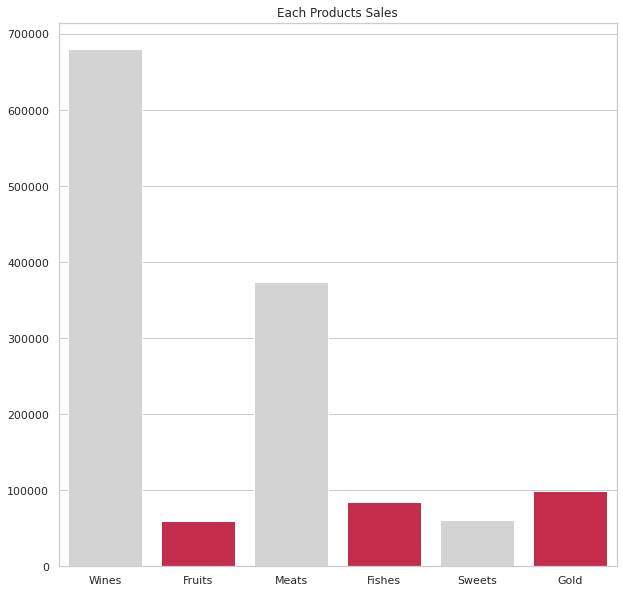

In [101]:
wines = df.MntWines.sum()
fruits = df.MntFruits.sum()
meats = df.MntMeatProducts.sum()
sweets = df.MntSweetProducts.sum()
fishes = df.MntFishProducts.sum()
gold = df.MntGoldProds.sum()
 
labels = ["Wines", "Fruits", "Meats", "Fishes", "Sweets", "Gold"]
values = [wines, fruits, meats, fishes, sweets, gold]
 
plt.figure(figsize = (10, 10))
sb.barplot(x = labels, y = values, palette = ["lightgray", "crimson"])
plt.title("Each Products Sales")
plt.show()

##  Which channels are underperforming?

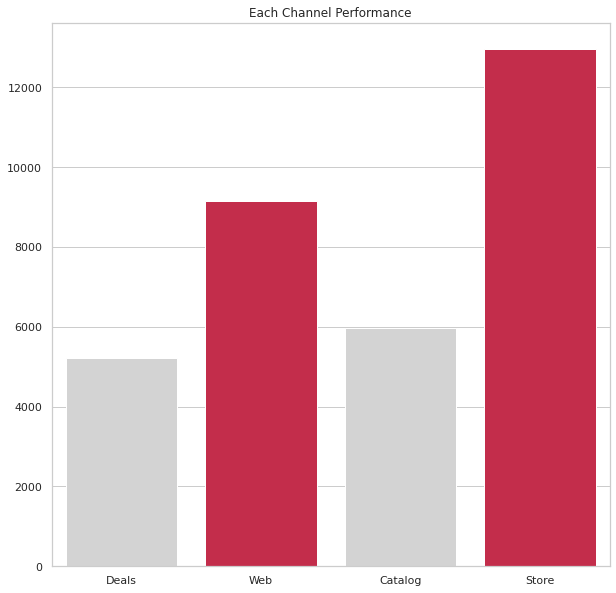

In [102]:
deals = df.NumDealsPurchases.sum()
web = df.NumWebPurchases.sum()
catalog = df.NumCatalogPurchases.sum()
store = df.NumStorePurchases.sum()
 
labels = ["Deals", "Web", "Catalog", "Store"]
values = [deals, web, catalog, store]
 
plt.figure(figsize = (10, 10))
sb.barplot(x = labels, y = values, palette = ["lightgray", "crimson"])
plt.title("Each Channel Performance")
plt.show()

## Report
 
1. Amount spent in products, income and have accepted campaigns are the most import factors related to number of purchases.
 
2. United States is the second worst country considering both purchases and amount spent.
 
3. Married PhD people probably do not buy more fish than the average.
 
4. The CMO is right and the people who spend much money buying gold have more purchases.
 
5. Factors related to fish sales are the same related to total purchases.
 
6. The denial of the campaign is the same since the first until the last one. SP (probably stands for Spain) is the country that most denies campaigns but at the same time is the country that most accepts campaigns. Also it is the country with the greatest number of total purchases and total spent.
 
7. The last campaign is the most successful by far, while the second campaign is the most failed. The others have a similar result.
 
8. Meat and Wine are the most selling products.
 
9. Web and Store are the most successful channels.
 
10. Most of customers did not complain in the last 2 years.

# Recommendations to CMO
 
1. Avoid campaigns like the second one.
 
2. Do more like the last one.
 
3. Focus in SP country.
 
4. Try selling more Wine and Meat.